In [38]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

start_date_october2015 = 1443657600000
delta_t_day = 86400000


In [ ]:
dtypes = {"timestamp":'str',"longitude":'float',"latitude":'float',"annotation":'str'}
data = pd.read_csv("ais_brest_synopses.csv",usecols=["timestamp","longitude","latitude","annotation"],dtype=dtypes)

In [88]:
#Conteggio Annotation base
annotation_simple_dict = {
    "10000000": 0,
    "01000000": 0,
    "00100000": 0,
    "00010000": 0,
    "00001000": 0,
    "00000100": 0,
    "00000010": 0,
    "00000001": 0
}
most_frequent=data["annotation"].value_counts()
most_dict=most_frequent.to_dict()

list_value = list(most_dict.values())
j = 0
for key in most_dict.keys():
    i = 0
    # pdb.set_trace()
    for element in key:
        if element == '1':
            list_key = list(annotation_simple_dict.keys())
            annotation_simple_dict[list_key[i]] += list_value[j]
        i += 1
    j += 1  
annotation_simple_dict

{'10000000': 776041,
 '01000000': 780440,
 '00100000': 3669276,
 '00010000': 96463,
 '00001000': 159126,
 '00000100': 162119,
 '00000010': 372104,
 '00000001': 390809}

In [105]:
plt.figure(1)
plt.barh(y=annotation_simple_dict.keys(),width=list(annotation_simple_dict.values()))
plt.show()
#annotation_simple_dict.plot(xlabel='month,year',kind='bar',width=0.8)

TypeError: unhashable type: 'dict_keys'

In [75]:
#data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data['month'] = pd.DatetimeIndex(data['timestamp']).month
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data.head(5)

,timestamp,longitude,latitude,annotation,month,year
0,2015-09-30 22:00:01,-4.347263,48.118046,00010000,9,2015
1,2015-09-30 22:00:02,-4.465718,48.382490,00010000,9,2015
2,2015-09-30 22:00:03,-4.496571,48.382420,00010000,9,2015
3,2015-09-30 22:00:04,-4.644325,48.092247,00010000,9,2015
4,2015-09-30 22:00:05,-4.485108,48.381320,00010000,9,2015


In [85]:
#month_analysis= data[['annotation', 'month','year']].groupby(['month'])['annotation'].count().reset_index(name='count_annotation')
month_analysis= data[['annotation', 'month','year']].groupby(['month','year']).agg('count')
month_analysis

,,annotation
month,year,
1,2016,815607
2,2016,874862
3,2016,851429
9,2015,2007
10,2015,647563
11,2015,770471
12,2015,675712


<AxesSubplot:xlabel='month,year'>

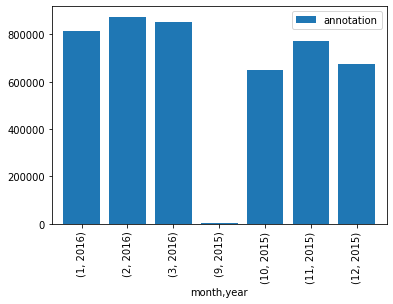

In [87]:
month_analysis.plot(xlabel='month,year',kind='bar',width=0.8)

In [59]:
#month_analysis_annotation= data[['annotation','month']].groupby(['month']).agg(['annotation'])
month_analysis_annotation=data.groupby(['month','annotation'])['annotation'].count().reset_index(name='count')
month_analysis_annotation

,month,annotation,count
0,1,00000001,7732
1,1,00000010,2254
2,1,00000100,10640
3,1,00001000,9315
4,1,00001001,642
...,...,...,...
210,12,10100000,41027
211,12,10100001,4837
212,12,10100100,1915
213,12,10101000,1678


<AxesSubplot:>

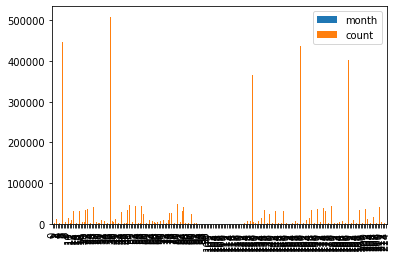

In [63]:
month_analysis_annotation.plot(kind='bar',width=0.8)

In [43]:

plt.figure(1)
plt.bar(month_analysis_annotation.keys, width=0.8)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'